# **Ecommerce Churn Rate Prediction**

Dataset source: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


Goal: Designing a machine learning model that will be able to properly predict churn users.

# **Initializing**


In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
def plotborder(plotname, bordercolor, tickcolor):
    ## Borders
    plotname.spines['top'].set_visible(False)
    plotname.spines['right'].set_visible(False)
    plotname.spines['bottom'].set_color(str(bordercolor))
    plotname.spines['left'].set_color(str(bordercolor))

    ## X-ticks Y-ticks
    plotname.tick_params(colors = str(tickcolor))
    
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)

In [3]:
def plotlabel(plotname, xlabel, ylabel, labelcolor):
    ## X-label
    plotname.set_xlabel(str(xlabel), fontsize = 12, color = str(labelcolor), labelpad = 10, fontweight = 'bold')

    ## Y-label
    plotname.set_ylabel(str(ylabel), fontsize = 12, color = str(labelcolor), labelpad = 10, fontweight = 'bold')

In [4]:
def barlabel(dataframe, labelcolumn, plotname, color):

    label1 = []
    label2 = []

    for i in dataframe.index:
        if i % 2 == 0:
            label1.append(dataframe[str(labelcolumn)][i])
        else:
            label2.append(dataframe[str(labelcolumn)][i])
    
    plotname.bar_label(plotname.containers[0], labels = label1, fontsize = 14, fontweight = 'bold', color = color, padding = +5)
    plotname.bar_label(plotname.containers[1], labels = label2, fontsize = 14, fontweight = 'bold', color = color, padding = +5)

In [5]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 1)

In [6]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# **Data Cleansing & Pre-Processing**

Data cleansing and pre-processing are essential steps in preparing data for predictive modelling. This process purpose is to rid the data of incorrect, incomplete, improperly formatted, or duplicative data; these data are useless data or at worst misleading. When data full of ‘junk’ are being used to design a predictive model, the model itself will turn out to be a ‘junk; as many people says “Garbage in, garbage out”.

## **Check Duplicate Data**

Duplicate datas can introduce bias into the model; since data that are supposed to be occuring only once ends up occuring more than once and weight more on the model's calculation. This particular data have no duplicate values so the data can be left alone.

In [9]:
df.duplicated().value_counts()

False    5630
dtype: int64

In [10]:
print('Duplicate Rows:',0)
print('Non-Duplicate Rows:', df.duplicated().value_counts()[0])

Duplicate Rows: 0
Non-Duplicate Rows: 5630


## **Dropping Features**

Having analysing the data previously in the analysis part, there are a few features that need to be preemptively removed:
1. CustomerID - is a random number assigned and will introduce a random element into the model.
2. Tenure - this is because keeping this feature will introduce bias in the model; since it was determined that most of the churn users are on `Tenure <=2` its important to be able to predict the users' churn probability as earlu as possible regardless of their tenure.
3. DaySinceLastOrder - a feature that indirectly also defines users' tenure; as it is the opposite of tenure.

In [11]:
df_copy = df.copy()
df_copy.drop(columns = ['CustomerID', 'Tenure', 'DaySinceLastOrder'], inplace = True)

## **Dealing With Missing Values**

The data have some features with missing value that needs to be addressed. Firstly it is possible to just drop all the missing value row and check if the row reduction would be too much or not.

In [12]:
df_drop = df_copy.dropna()
print('Rows before dropna:', len(df_copy))
print('Rows left after dropna:', len(df_drop))
print('Data Shrinkage:', round((len(df_copy) - len(df_drop))/len(df_copy)*100, 2), '%')

Rows before dropna: 5630
Rows left after dropna: 4345
Data Shrinkage: 22.82 %


Dropping all rows with missing value reduces the data size by 28.28%; which is too much so another treatment for missing values need to be done. Since all the missing values are on numerical columns, there are two choices, to fill all missing values with mean or median. With some of the features needing an integer (rounded non-decimal numbers) `CityTier` or boolean feature that are defined by 0/1; most of the features' mean and median are close to each other; for this case filling missing value with median would be more fitting.

In [13]:
df_2 = df_copy.copy()

## Fill missing value only on numerical columns
for i in df_copy.columns:
    if (df_2[i].dtypes == 'int64' or df_2[i].dtypes == 'float64'):
        df_2[i] = df_2[i].fillna(round(df_2[i].median(),0))

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   PreferredLoginDevice         5630 non-null   object 
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5630 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   HourSpendOnApp               5630 non-null   float64
 7   NumberOfDeviceRegistered     5630 non-null   int64  
 8   PreferedOrderCat             5630 non-null   object 
 9   SatisfactionScore            5630 non-null   int64  
 10  MaritalStatus                5630 non-null   object 
 11  NumberOfAddress              5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

## **Outlier filter with Zscore**

By definition, an outlier is an object (in this case data) that diverge substantially from the rest of the group's average. Outliers usually introduce noises in data and often something that breaks a pattern.   

It is important to take care of outlier data that are going to be used to design a predictive model. Most of the time, removing outlier value from the whole data will help improve the performance of the model; it is better to remove the outlier in this case.

The outlier filter will be using z-score. Z-scores gives a score of how many `times of standard deviation` the distance of the data is from its dataset average. The break point is on **3 times standard deviation**, since 3 times standard deviation represents 99.7% of the whole dataset on a normal distribution data.

In [14]:
df_3 = df_2.copy()

## Filter Zscore to only numerical columns
for i in df_3.columns:
    if (df_3[i].dtypes == 'int64' or df_2[i].dtypes == 'float64'):
        z_scores = np.abs(ss.zscore(df_3[i]))
        filter_entry = (z_scores < 3)
        df_3[i] = df_3[i][filter_entry]

## Drop NA value (outlier values)
df_3.dropna(inplace = True)
df_3

,Churn,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
0,1,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9.0,1,11.0,1.0,1.0,159.93
1,1,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7.0,1,15.0,0.0,1.0,120.90
2,1,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6.0,1,14.0,0.0,1.0,120.28
3,1,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8.0,0,23.0,0.0,1.0,134.07
4,1,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3.0,0,11.0,1.0,1.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6.0,0,18.0,1.0,2.0,150.71
5626,0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6.0,0,16.0,1.0,2.0,224.91
5627,0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3.0,1,21.0,1.0,2.0,186.42
5628,0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4.0,0,15.0,2.0,2.0,178.90


In [15]:
print('Rows before outlier filter:', len(df_2))
print('Rows left after outlier filter:', len(df_3))

Rows before outlier filter: 5630
Rows left after outlier filter: 5380


## **Class Imbalance**

Since this is a classification problem, there is a need to check for class imbalance on the target data. Class imbalance is where the class distribution across the data is knowned to be biased or skewed; in this case the class is the churn data. 

Original data class distribution:

In [16]:
print('Non-Churn Users:', df_3['Churn'].value_counts()[0])
print('Churn Users:', df_3['Churn'].value_counts()[1])

Non-Churn Users: 4467
Churn Users: 913


The target, churn/non-churn status of users, distribution is biased towards 'non-churn'; it is 83% of the whole sample. With this bias, the 'minority' class could end up being ignored by the model; simply stating that all of the users as 'non-churn' users would result in 83% accuracy.

There are alot of different methods to deal with class imbalance issue, one of them is to oversample the data. In this case oversampling is done with SMOTE. The resulting oversampling is to equalize the data size for both classes.

In [17]:
X = df_3.drop(columns = 'Churn')
y = df_3[['Churn']]

In [18]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features = [0,3,4,7, 9], random_state = 0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

Oversampled data class distribution:

In [19]:
print('Non-Churn Users:', y_resampled.value_counts()[0])
print('Churn Users:', y_resampled.value_counts()[1])

Non-Churn Users: 4467
Churn Users: 4467


## **One-Hot Ecoding for Object Features**

In [20]:
for i in X_resampled.columns:
    if X_resampled[i].dtypes == 'O':
        X_resampled = X_resampled.join(pd.get_dummies(X_resampled[i], prefix = i))
        X_resampled = X_resampled.drop(columns = i)

In [21]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8934 entries, 0 to 8933
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CityTier                               8934 non-null   int64  
 1   WarehouseToHome                        8934 non-null   float64
 2   HourSpendOnApp                         8934 non-null   float64
 3   NumberOfDeviceRegistered               8934 non-null   int64  
 4   SatisfactionScore                      8934 non-null   int64  
 5   NumberOfAddress                        8934 non-null   float64
 6   Complain                               8934 non-null   int64  
 7   OrderAmountHikeFromlastYear            8934 non-null   float64
 8   CouponUsed                             8934 non-null   float64
 9   OrderCount                             8934 non-null   float64
 10  CashbackAmount                         8934 non-null   float64
 11  Pref

# **Machine Learning Modelling**

The classification methods that are going to be used are 2 of the most basic methods; Desicion Tree and Random Forest.
While the scoring would be based on 'Recall', because for predicting churn it is important to get as high a possible of true positive prediction.

Other basic parameters for the model:
1. 80/20 train/test split
2. Model are based on sklearn library

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from scipy.stats import uniform

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print("AUC: %.2f" % auc(fpr, tpr))

## **Decision Tree**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 2 / 10, random_state = 42) 

In [25]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state = 42)
decisiontree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=42)

In [26]:
train_pred = decisiontree.predict(X_train)
test_pred = decisiontree.predict(X_test)

print('Train Recall:', round(recall_score(y_train, train_pred), 5))
print('Test Recall:', round(recall_score(y_test, test_pred), 5), '\n')

eval_classification(decisiontree, test_pred, X_train, y_train, X_test, y_test)

Train Recall: 1.0
Test Recall: 0.93574 

Accuracy (Test Set): 0.93
Precision (Test Set): 0.92
Recall (Test Set): 0.94
F1-Score (Test Set): 0.93
AUC: 0.93


## **Random Forest**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 2 / 10, random_state = 42) 

In [28]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 42)
randomforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [29]:
train_pred = randomforest.predict(X_train)
test_pred = randomforest.predict(X_test)

print('Train Recall:', round(recall_score(y_train, train_pred), 5))
print('Test Recall:', round(recall_score(y_test, test_pred), 5), '\n')

eval_classification(randomforest, test_pred, X_train, y_train, X_test, y_test)

Train Recall: 1.0
Test Recall: 0.95716 

Accuracy (Test Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.96
F1-Score (Test Set): 0.97
AUC: 0.97


# **Model Tuning**

Out of the 2 models, Random Forest model results in a better result out of the shelf, so the model would be based on Random Forest.
However, some tuning would still need to be done. Most of the time tree based model out of the shelf tend to overfit; one clear indication is that the train score result is 100%.

## **Hyperparameter Tuning**

The most important hyperparameter to tune in a tree based model is the `max-depth`. This is because on default the `max-depth` varibale is set to infitie (maximum) value; this lets the model to keep making new tree and leaf to cater to the diff data combinations which ends up overfitting the data. To check check what the best `max-depth` should be, it is possible to check by drawing a graph:

In [30]:
max_depth = []
i = 1
while i < 21:
    max_depth.append([i])
    i = i + 1

In [31]:
Train = []
Test = []

for i in max_depth:
    hyperparameters = dict(max_depth = i)

    rf = RandomForestClassifier(random_state = 1)
    model = GridSearchCV(rf, hyperparameters)
    model.fit(X_train, y_train.values.ravel())

    train_pred =model.predict(X_train)
    test_pred = model.predict(X_test)

    Test.append(recall_score(y_test, test_pred)) 
    Train.append(recall_score(y_train, train_pred))

In [32]:
palette = ["lightslategrey", "cadetblue", '#444f4f']
sns.set_palette(sns.color_palette(palette))

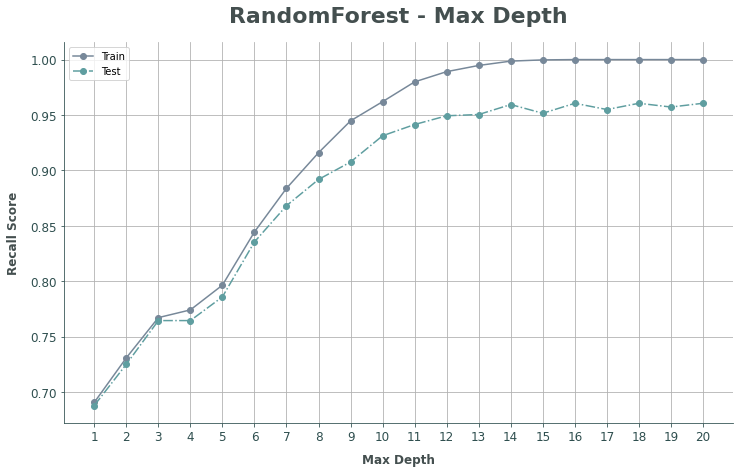

In [33]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(max_depth, Train, label = 'Train', marker = 'o', linestyle = '-')
ax.plot(max_depth, Test, label = 'Test', marker = 'o', linestyle = '-.')

plotlabel(ax, 'Max Depth', 'Recall Score', '#444f4f')

plotborder(ax, 'darkslategrey', 'darkslategrey')

ax.set_title('RandomForest - Max Depth', pad = 20, fontsize = 22, color = '#444f4f', fontweight = 'bold')
ax.legend()

plt.grid()
ax.set_xticks(max_depth);

In [34]:
a = pd.DataFrame(max_depth)
b = pd.DataFrame(Train)
c = pd.DataFrame(Test)

maxdepthresults = pd.concat([a, b, c], axis = 1)
maxdepthresults.columns = ['max-depth', 'train-score', 'test-score']
maxdepthresults['score-diff'] = maxdepthresults['train-score'] - maxdepthresults['test-score']

maxdepthresults

,max-depth,train-score,test-score,score-diff
0,1,0.690503,0.687711,0.002791
1,2,0.730726,0.724915,0.005811
2,3,0.767039,0.764374,0.002665
3,4,0.774022,0.764374,0.009648
4,5,0.796369,0.785795,0.010574
5,6,0.844413,0.835400,0.009013
6,7,0.883799,0.868095,0.015704
7,8,0.915922,0.891770,0.024152
8,9,0.944693,0.907554,0.037139
9,10,0.962011,0.931229,0.030782


From the graph above, there are 2 important thing to observe:
1. Growth of discrepancy between scores of `Train` and `Test` results. For obvious reasons, train score result will often if not always be higher; but the bigger the discrepancy of both scores would indicate the model to be overfitting.
2. Shape of the curve; where the growth in score starts to slows down.
3. Plateu-ing of the scores, where the scores stop improving. 

Considering both points, the best `max-depth` would be n = 14.

## **Random Forest (Tuned)**

In [35]:
rf = RandomForestClassifier(random_state = 1, max_depth = 14)
rf.fit(X_train, y_train.values.ravel())

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print('Train Recall:', round(recall_score(y_train, train_pred), 5))
print('Test Recall:', round(recall_score(y_test, test_pred), 5), '\n')

eval_classification(model, test_pred, X_train, y_train, X_test, y_test)

Train Recall: 0.9986
Test Recall: 0.95941 

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
AUC: 0.96


## **Feature Importance**

Text(0.5, 1.0, 'RandomForest - Feature Importance')

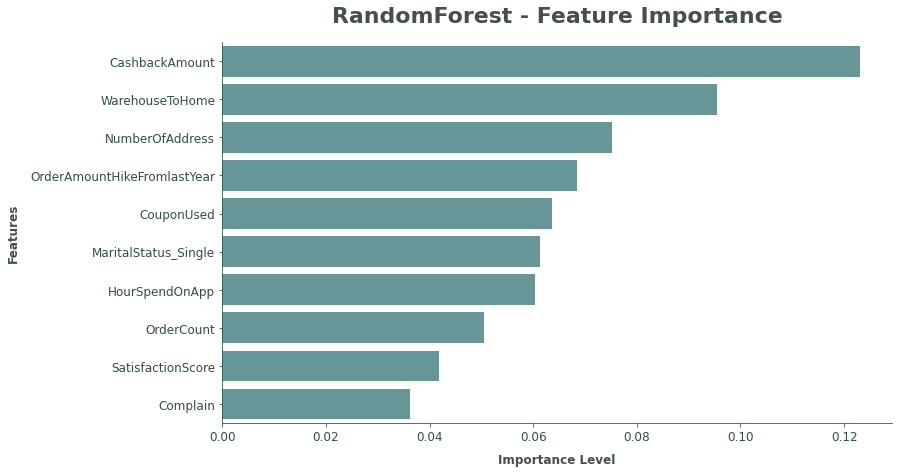

In [36]:
feat_importances = pd.DataFrame(rf.feature_importances_, index = X_resampled.columns).reset_index()
feat_importances.columns = ['Feature', 'Importance'] 
feat_importances = feat_importances.nlargest(10, 'Importance').sort_values(by = ['Importance'], ascending = False)

fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.barplot(data = feat_importances, x = 'Importance', y = 'Feature', color = 'cadetblue')

## X-label Y-label
plotlabel(ax, 'Importance Level', 'Features', '#444f4f')

## Borders
plotborder(ax, 'darkslategrey', 'darkslategrey')

ax.set_title('RandomForest - Feature Importance', pad = 20, fontsize = 22, color = '#444f4f', fontweight = 'bold')

## **Cross Validation**

To be able to check if the model is reliable, it is important to do a cross validation. One of the way is to iterate the model into multiple folds.

Folds are designed to split the train data into 2 parts; (1) data that will actually be used to train model; (2) data to validate test results.
Since the original train data is 80% of the total sample, the data are split into 8 parts, each part representing 10% of the sample. Every fold iteration then will select 1 out of 8 parts in turn and designate it to be the validation data; the rest of the 7 parts are combined to be the test data. This will result in 8 different train, test, and validatin scores to be observed.

In [37]:
score_train = []
score_test = []
score_val = []
folds = []

kfold = KFold(n_splits = 8, random_state = 1, shuffle = True)

for i, (train_index, test_index) in enumerate(kfold.split(X_train)):
    X1_train, X1_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]

    rf.fit(X1_train, y1_train.values.ravel())

    train_pred = rf.predict(X1_train)
    test_pred = rf.predict(X_test)
    val_pred = rf.predict(X1_test)
    
    folds.append(i)
    score_train.append(recall_score(y1_train, train_pred)) ##score of per fold's model with fold's train target; prediction using fold's train features
    score_test.append(recall_score(y_test, test_pred)) ##score of per fold's model with fold's test target;  prediction using fold's test features
    score_val.append(recall_score(y1_test, val_pred)) ##score of per fold's model with test target; prediction using test features
    

Text(5, 0.975, '\n    * Train Standard Deviation : 0.00038\n    * Test Standard Deviation : 0.00442 \n    * Val Standard Deviation : 0.00598     \n')

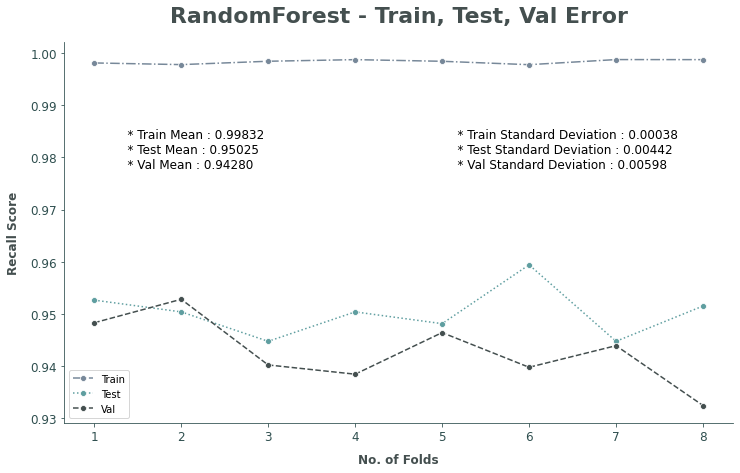

In [38]:
test_mean = np.mean(score_test)
train_mean = np.mean(score_train)
val_mean = np.mean(score_val)

train_std = np.std(score_train)
test_std = np.std(score_test)
val_std = np.std(score_val)

foldnum = [x + 1 for x in folds]

fig, ax = plt.subplots(figsize = (12, 7))
ax = sns.lineplot(x = foldnum, y = score_train , label = 'Train', marker = 'o', linestyle = '-.')
ax = sns.lineplot(x = foldnum, y = score_test , label = 'Test', marker = 'o', linestyle = ':')
ax = sns.lineplot(x = foldnum, y = score_val , label = 'Val', marker = 'o', linestyle = '--')

plotlabel(ax, 'No. of Folds', 'Recall Score', '#444f4f')

plotborder(ax, 'darkslategrey', 'darkslategrey')

ax.set_title('RandomForest - Train, Test, Val Error', pad = 20, fontsize = 22, color = '#444f4f', fontweight = 'bold')

ax.legend(loc = 'best')

## print mean value 
text_m = '''
    * Train Mean : ''' + str(format(train_mean, '.5f')) + '''
    * Test Mean : ''' + str(format(test_mean, '.5f')) + ''' 
    * Val Mean : ''' + str(format(val_mean, '.5f')) + '''     
'''
ax.text(1.2, 0.975, text_m, horizontalalignment = 'left', color = 'black', fontsize = 12, fontweight = 'normal')

## print standard deviation value 
text_s = '''
    * Train Standard Deviation : ''' + str(format(train_std, '.5f')) + '''
    * Test Standard Deviation : ''' + str(format(test_std, '.5f')) + ''' 
    * Val Standard Deviation : ''' + str(format(val_std, '.5f')) + '''     
'''
ax.text(5, 0.975, text_s, horizontalalignment = 'left', color = 'black', fontsize = 12, fontweight = 'normal')

From the graph above, it is clear that the model shows constant results; which means that the model is reliable enough to be used.

# **Predictive Model Implications**

Using the predictive model it is possible to predict whether a particular user will churn or not. Since there is no *future* data available to test the model with; using the existing data, albeit was used to train the model, is the only option available. 

To simulate proper business implication, the test will be in a form of simulation if the model is actually being implemented.

## **Simulation Conditions**

Since there is no context of how big the data is, or how capable the hardwares that are going to run the model, it is safe to assume that the model would be ran once a day at the end of the day.

With this condition comes a limitation to which users that could be mitigated, specifically users that churns on day 0; it is not possible to mitigate users that churn on the same day they register because the model only predict after the end of the day.

In [39]:
df_test = df.copy()

## filtering churn tenure 0 users
df_test = df_test.loc[~((df_test['Churn'] == 1) & (df_test['Tenure'] == 0))]

## dropping unwanted feateures
df_test.drop(columns = ['CustomerID', 'Tenure', 'DaySinceLastOrder'], inplace = True)

## filling missing values with median
for i in df_test.columns:
    if (df_test[i].dtypes == 'int64' or df_test[i].dtypes == 'float64'):
        df_test[i] = df_test[i].fillna(round(df_test[i].median(),0))

In [40]:
X = df_test.drop(columns = 'Churn')
y = df_test[['Churn']]

In [41]:
for i in X.columns:
    if X[i].dtypes == 'O':
        X = X.join(pd.get_dummies(X[i], prefix = i))
        X = X.drop(columns = i)

In [42]:
results = rf.predict(X)

In [43]:
from sklearn.metrics import confusion_matrix

confusionmatrix = confusion_matrix(y, results)

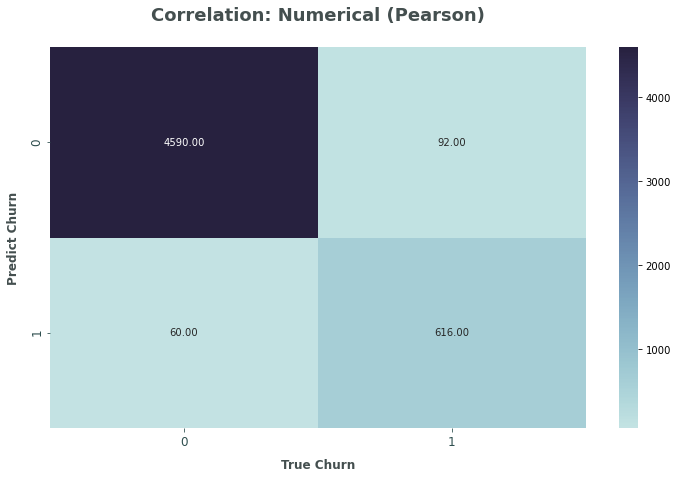

In [44]:
confusionplot = plt.figure(figsize = (12, 7))
confusionplot = sns.heatmap(confusionmatrix, annot = True, fmt = '.2f', cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

confusionplot.set_title('Correlation: Numerical (Pearson)\n', fontsize = 18, fontweight = 'bold', color = '#444f4f')

plotlabel(confusionplot, 'True Churn', 'Predict Churn', '#444f4f')

plotborder(confusionplot, 'darkslategrey', 'darkslategrey')

The results shows that out of all of the churn users, there are `616` correcly predicted churn users from a total of `948` churn users.

## **Business Impact**

After being able to predict which users are at a high risk of churning, it is important to be able to follow up that information with a business actions.
There are alot of different business actions that could be taken; some recommendations are given on the first part of this project. Obviously, how effective the business actions taken are yet to be known; it is possible, however, to forecast the business impact if actions taken are effective in turning possible churn users into loyal users.

For this calculation there are some assumption to be taken:
1. Revenue from users are assumed from their Cashback gained (cashback is set to a 10% flat).
    - Churn users average revenue: 1400000
    - User's LTV: 2200000 (minimum)
2. Acquisition cost is 650000.
3. Retention cost is 20% of Acquisition cost, 130000.
4. Every churn users are replaced with a new user with acquisition cost.

From these assumption it is possible to forecast the business impact depending on how effective the business actions taken are.

In [45]:
target = 616
churn_rev = 1400000
ltv = 2200000
acq_cost = 650000
ret_cost = 130000
success_rate = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
revenue = []

for i in success_rate:
    succ_percent = i

    ret_users = target * succ_percent
    churn_users = target - ret_users

    total_acq = churn_users * acq_cost
    total_ret = ret_users * ret_cost

    total_churn_rev = churn_users * churn_rev 
    total_ltv = ret_users * ltv

    result = int(total_ltv+total_churn_rev-total_acq-total_ret)
    revenue.append(result)

In [46]:
success_percent = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
a = pd.DataFrame(success_percent)
b = pd.DataFrame(revenue)

implication = pd.concat([a, b], axis = 1)
implication.columns = ['Churn Users Converted', 'Revenue']
implication['Gain %'] = implication['Revenue'].apply(lambda x: ((x / implication['Revenue'][0] * 100) - 100))
implication

,Churn Users Converted,Revenue,Gain %
0,0%,462000000,0.0
1,10%,543312000,17.6
2,20%,624624000,35.2
3,30%,705936000,52.8
4,40%,787248000,70.4
5,50%,868560000,88.0
6,60%,949872000,105.6
7,70%,1031184000,123.2
8,80%,1112496000,140.8
9,90%,1193808000,158.4


The gain in revenue for converting high-risk of churning users into loyal users are quite significant; even though it is linear, it is 17.6% growth per 10% of churn users converted. This is of course only for one month. The growth would become more significant and exponential with time passed, the growth of loyal users and LTV would stack together and increase the gain. 